In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Gold Price.csv')
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83
3,2014-01-04,29279,29279,29279,29279,0,-1.51
4,2014-01-06,29119,29300,29395,29051,24380,-0.55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2227 non-null   object 
 1   Price   2227 non-null   int64  
 2   Open    2227 non-null   int64  
 3   High    2227 non-null   int64  
 4   Low     2227 non-null   int64  
 5   Volume  2227 non-null   int64  
 6   Chg%    2227 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 121.9+ KB


In [4]:
df = df.drop(['Date'],axis=1)

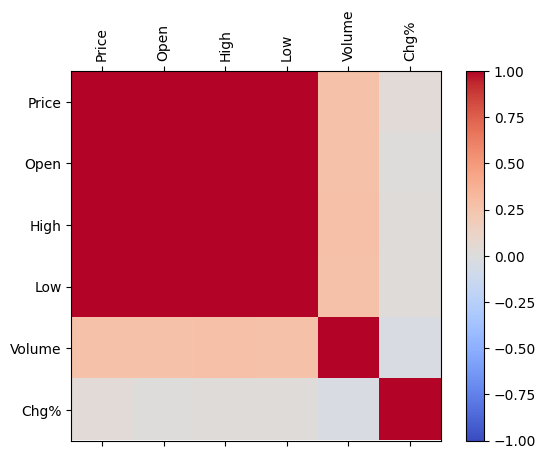

In [5]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [6]:
df = df.drop(['Chg%'],axis=1)

In [7]:
y=df.Price
x=df.drop('Price',axis=1)


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [9]:
y_predict =ml.predict(x_test)

In [10]:
ml.predict([(29435,29598,29340,2930)])

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29479.9643106])

In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

print("Mean absolute error (MAE): %f"%mean_absolute_error(y_test, y_predict))
print("Mean Squared error (MSE): %f"%mean_squared_error(y_test, y_predict))
print("Roots Mean Squared error (RMSE): %f"%math.sqrt(mean_squared_error(y_test, y_predict)))
print("R2 Score: %f"%r2_score(y_test, y_predict))

Mean absolute error (MAE): 88.898179
Mean Squared error (MSE): 18805.680398
Roots Mean Squared error (RMSE): 137.133805
R2 Score: 0.999761


Text(0.5, 1.0, 'Actual vs Predicted')

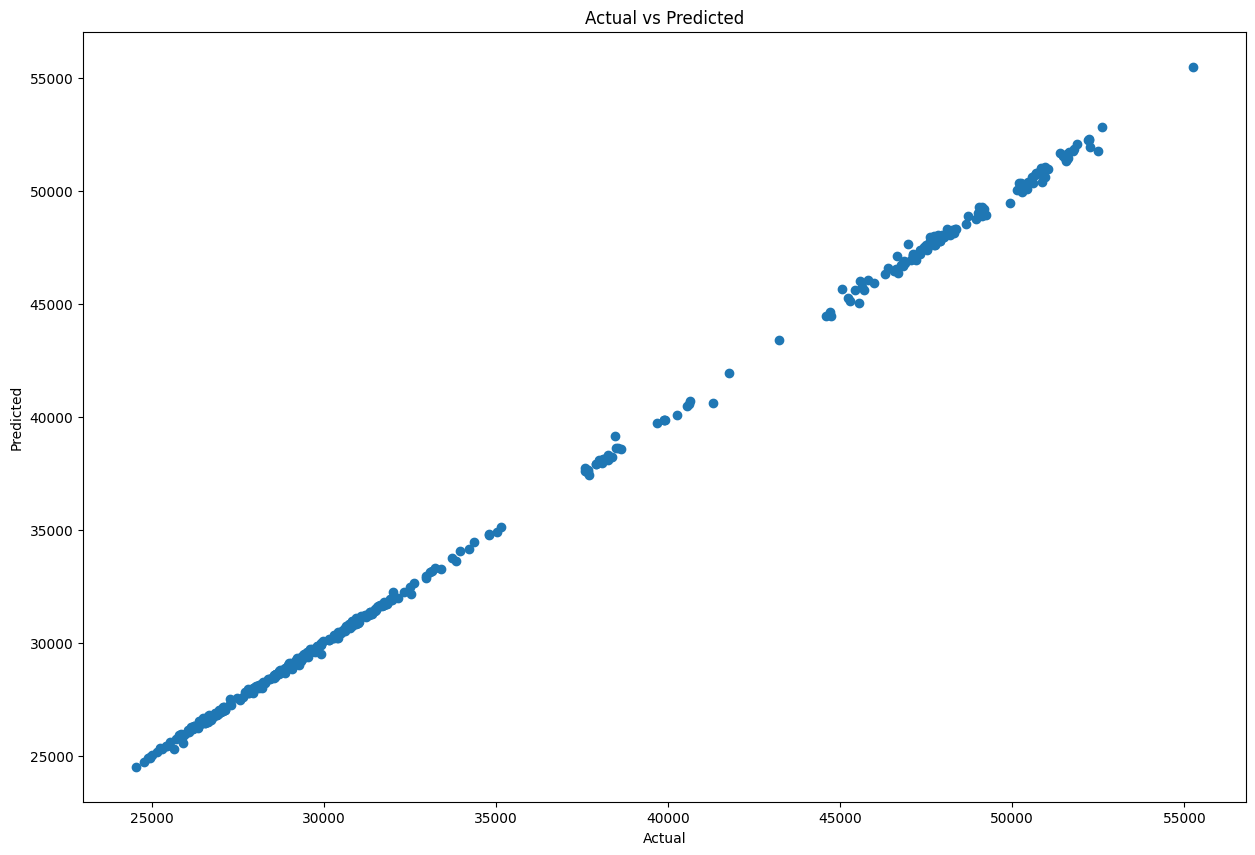

In [12]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [13]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted value':y_predict, 'Difference':y_test-y_predict})
pred_y_df

,Actual Value,Predicted value,Difference
1161,30804,30863.005013,-59.005013
1993,46858,46901.947601,-43.947601
148,28120,28170.760616,-50.760616
776,27746,27782.293482,-36.293482
2124,51522,51461.660685,60.339315
...,...,...,...
461,26965,26895.388826,69.611174
831,29204,29231.931285,-27.931285
438,27290,27514.640307,-224.640307
299,26635,26776.364175,-141.364175
